In [1]:
import pandas as pd
import os
import kagglehub

# Download the latest version of the dataset
dataset_path = kagglehub.dataset_download("rabieelkharoua/alzheimers-disease-dataset")

print("Dataset path:", dataset_path)

# List files in the dataset directory
files = os.listdir(dataset_path)
print("Files in dataset:", files)

# Choose the correct CSV file
csv_file = [f for f in files if f.endswith('.csv')]
if not csv_file:
    raise FileNotFoundError("No CSV file found in the dataset directory.")
csv_file_path = os.path.join(dataset_path, csv_file[0])

# Load the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Display the first few rows
print(df.head())

100%|██████████| 268k/268k [00:00<00:00, 364kB/s]

Extracting files...
Dataset path: C:\Users\katro\.cache\kagglehub\datasets\rabieelkharoua\alzheimers-disease-dataset\versions\1
Files in dataset: ['alzheimers_disease_data.csv']
   PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0       4751   73       0          0               2  22.927749        0   
1       4752   89       0          0               0  26.827681        0   
2       4753   73       0          3               1  17.795882        0   
3       4754   74       1          0               1  33.800817        1   
4       4755   89       0          0               0  20.716974        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  ...  MemoryComplaints  \
0           13.297218          6.327112     1.347214  ...                 0   
1            4.542524          7.619885     0.518767  ...                 0   
2           19.555085          7.844988     1.826335  ...                 0   
3           12.209266          8.428001     7.435

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [3]:
# Calculate value counts for a Patient ID column
ptid_value_counts = df['PatientID'].value_counts()

# Display the value counts
print(ptid_value_counts)

PatientID
4751    1
6179    1
6193    1
6192    1
6191    1
       ..
5462    1
5461    1
5460    1
5459    1
6899    1
Name: count, Length: 2149, dtype: int64


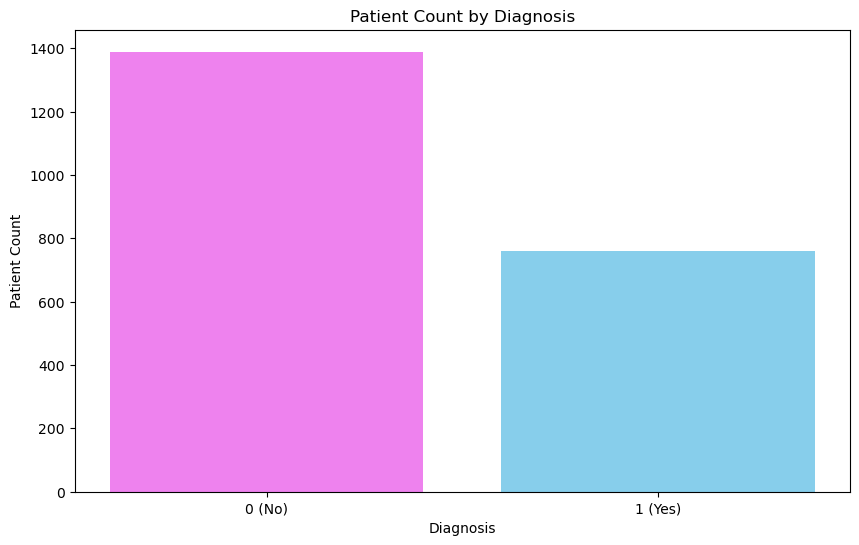

In [ ]:
# Plot bar chart of diagnosis value counts
import matplotlib.pyplot as plt

# Calculate value counts for the 'diagnosis' column
diagnosis_counts = df['Diagnosis'].value_counts()

# Plot the value counts as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(diagnosis_counts.index, diagnosis_counts.values, color=['violet' if x == 0 else 'skyblue' for x in diagnosis_counts.index])
plt.xlabel('Diagnosis')
plt.ylabel('Patient Count')
plt.title('Patient Count by Diagnosis')
plt.xticks(ticks=[0, 1], labels=['0 (No)', '1 (Yes)'])
plt.show()


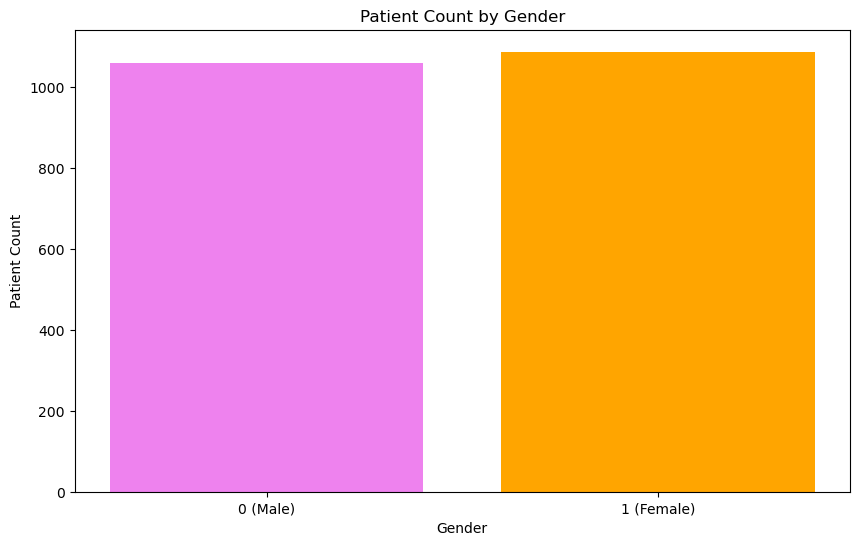

In [21]:
# Calculate value counts for the 'diagnosis' column
gender_counts = df['Gender'].value_counts()

# Plot the value counts as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(gender_counts.index, gender_counts.values, color=['violet' if x == 0 else 'orange' for x in gender_counts.index])
plt.xlabel('Gender')
plt.ylabel('Patient Count')
plt.title('Patient Count by Gender')
plt.xticks(ticks=[0, 1], labels=['0 (Male)', '1 (Female)'])
plt.show()

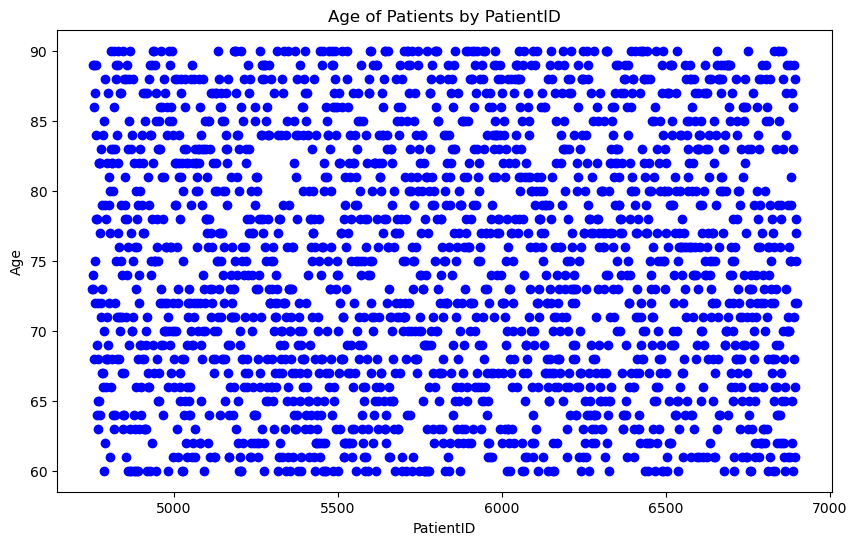

In [28]:
# Plot age on a scatter plot with PatientID
plt.figure(figsize=(10, 6))
plt.scatter(df['PatientID'], df['Age'], color='blue')
plt.xlabel('PatientID')
plt.ylabel('Age')
plt.title('Age of Patients by PatientID')
plt.show()

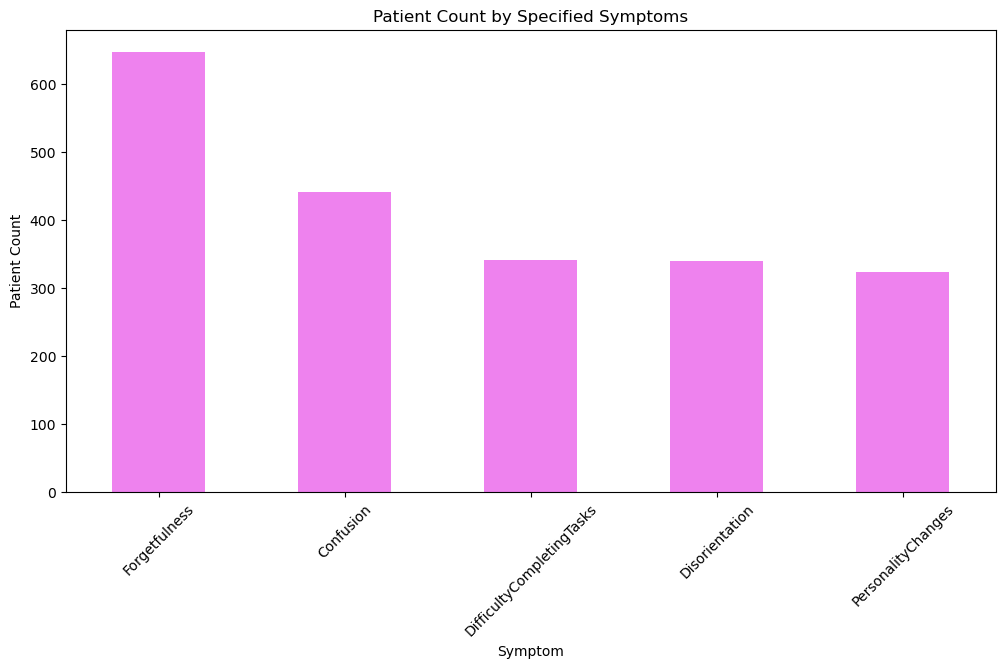

In [35]:

# Filter for the specified symptoms
specified_symptoms = ['Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness']
df_filtered = df_melted[df_melted['Symptom'].isin(specified_symptoms)]

# Calculate the patient count for each symptom
symptom_counts = df_filtered[df_filtered['Presence'] == 1]['Symptom'].value_counts()

# Plot the patient count grouped by symptom
plt.figure(figsize=(12, 6))
symptom_counts.plot(kind='bar', color='violet')
plt.xlabel('Symptom')
plt.ylabel('Patient Count')
plt.title('Patient Count by Specified Symptoms')
plt.xticks(rotation=45)
plt.show()